In [5]:
import pandas as pd
import numpy as np
import sys

version = ".".join(map(str, sys.version_info[:3]))
print('python version ', version)
print('numpy version ', np.__version__)
print('pandas version ',pd.__version__)

python version  3.6.0
numpy version  1.11.3
pandas version  0.20.1


In [6]:
import geopandas as gpd
import pysal

print("geopandas version ", gpd.__version__)

geopandas version  0.2+52.ge5f5eac


In [48]:
import matplotlib.pyplot as plt

In [7]:
# Tell the kernel that we want the plots to be in this notebook
# and not in an external window
%matplotlib inline

In [8]:
ls ../../data/census

CBP/  PEP_2016_GCTPEPANNR.US23PR/


In [26]:
filename = '../../data/census/CBP/cbp15co.txt'
cbp_county_2015_df = pd.read_csv(filename,
                                 dtype={'FIPSTATE': str,
                                        'FIPSCTY': str})
print('rows, columns ', cbp_county_2015_df.shape)
cbp_county_2015_df.head()

rows, columns  (2126601, 26)


,FIPSTATE,FIPSCTY,NAICS,EMPFLAG,EMP_NF,EMP,QP1_NF,QP1,AP_NF,AP,...,N100_249,N250_499,N500_999,N1000,N1000_1,N1000_2,N1000_3,N1000_4,CENSTATE,CENCTY
0,01,001,------,NaN,G,10454,G,76437,G,321433,...,6,2,1,0,0,0,0,0,63,1
1,01,001,11----,NaN,H,70,H,790,H,3566,...,0,0,0,0,0,0,0,0,63,1
2,01,001,113///,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1
3,01,001,1133//,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1
4,01,001,11331/,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1


In [36]:
geoids = [state + county for state, county in zip(cbp_county_2015_df['FIPSTATE'], cbp_county_2015_df['FIPSCTY'])]
cbp_county_2015_df['GEOID'] = geoids

In [37]:
ecom_df = cbp_county_2015_df[cbp_county_2015_df['NAICS'] == '454111']
ecom_df.shape

(1824, 27)

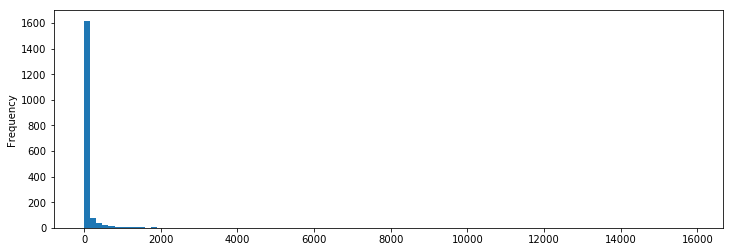

In [29]:
ecom_df['EMP'].plot.hist(bins=100, figsize=(12,4))

In [30]:
ecom_co_gt39_df = ecom_df[ecom_df.EMP > 39]
ecom_co_gt39_df.shape

(441, 26)

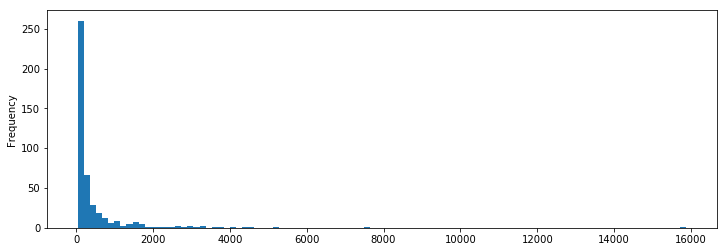

In [31]:
ecom_co_gt39_df['EMP'].plot.hist(bins=100, figsize=(12,4))

In [24]:
cb_2015_us_county = '../../data/shapefiles/cb_2015_us_county_500k/cb_2015_us_county_500k.shp'
us_county_df = gpd.read_file(cb_2015_us_county)
us_county_df.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,005,00161528,0500000US01005,01005,Barbour,06,2291820706,50864677,"POLYGON ((-85.74803199999999 31.619181, -85.74..."
1,01,023,00161537,0500000US01023,01023,Choctaw,06,2365954971,19059247,"POLYGON ((-88.47322699999999 31.893856, -88.46..."
2,01,035,00161543,0500000US01035,01035,Conecuh,06,2201896058,6643480,"POLYGON ((-87.42720399999999 31.26436, -87.425..."


In [42]:
cb_2015_us_state = '../../data/shapefiles/cb_2015_us_state_500k/cb_2015_us_state_500k.shp'
us_state_df = gpd.read_file(cb_2015_us_state)
us_state_df.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198972429772,1356294775,"POLYGON ((-104.053418545071 41.1705389679833, ..."
1,53,01779804,0400000US53,53,WA,Washington,00,172121026344,12540093192,"(POLYGON ((-122.33164 48.020556, -122.328343 4..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314161426332,755674004,"POLYGON ((-109.050173 31.480004, -109.049843 3..."


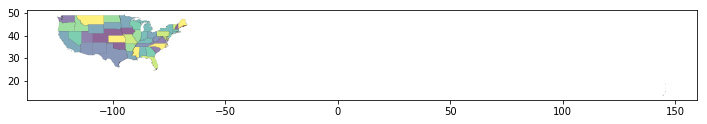

In [49]:
us_state_df.plot(linewidth=0.06,
                 alpha=0.6,
                 figsize=(12, 6))